# <a id='toc1_'></a>[Data preparation](#toc0_)

## <a id='toc1_1_'></a>[Loading datasets](#toc0_)

It will be necessary to adapt the code and interpretations to the chosen community

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns

In [2]:
# make sure that your dates are in the right format
df = pd.read_csv("final_timeseries.csv")
df.head()

date  checkins  day  month  year  weekday  is_weekend  week_of_year  \
0  2011-04-01      76.0    1      4  2011        4           0            13   
1  2011-04-02      97.0    2      4  2011        5           1            13   
2  2011-04-03     114.0    3      4  2011        6           1            13   
3  2011-04-04      38.0    4      4  2011        0           0            14   
4  2011-04-05      46.0    5      4  2011        1           0            14   

   quarter  is_month_start  ...  checkins_30window_ema  \
0        2               1  ...              60.780992   
1        2               0  ...              63.117702   
2        2               0  ...              66.400431   
3        2               0  ...              64.568145   
4        2               0  ...              63.370201   

   checkins_30window_rolling_max  checkins_30window_rolling_min  \
0                          120.0                           28.0   
1                          120.0                           28.0   
2                          120.0                           28.0   
3                          120.0                           28.0   
4                          120.0                           28.0   

   checkins_30window_skew  checkins_30window_kurt  \
0                0.626538               -0.890964   
1                0.487372               -1.101781   
2                0.374457               -1.272709   
3                0.506288               -1.173603   
4                0.567445               -1.160992   

   checkins_30window_pct_change_lag  economy_employment_rate  \
0                          1.111111                      9.1   
1                          2.031250                      9.1   
2                          1.425532                      9.1   
3                         -0.573034                      9.1   
4                         -0.323529                      9.1   

   economy_consumer_confidence  economy_gdp  economy_inflation_rate  
0                         69.8    15557.539                0.643943  
1                         69.8    15557.539                0.643943  
2                         69.8    15557.539                0.643943  
3                         69.8    15557.539                0.643943  
4                         69.8    15557.539                0.643943  

[5 rows x 43 columns]

Filling the missing date

In [3]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a complete date range from the minimum to the maximum date
full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Reindex the dataframe to include all dates in the full date range
daily_df = df.set_index('date').reindex(full_date_range)

# Use fillna to fill missing 'checkins' values (e.g., with 0 or a specific value)
daily_df['checkins'] = daily_df['checkins'].ffill()  # You can replace 0 with another value if needed

daily_df = daily_df.reset_index().rename(columns={'index': 'date'})


Visualizing the time series

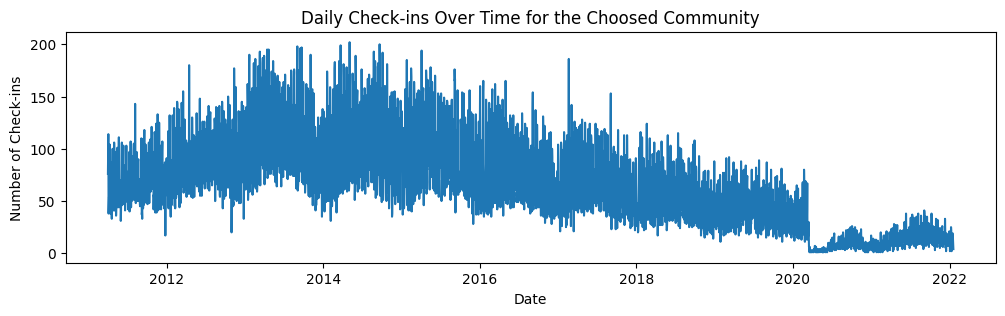

In [4]:
import matplotlib.pyplot as plt

# Create the plot
_, ax = plt.subplots(figsize=(12, 3))
ax.plot(daily_df['date'], daily_df['checkins'])

# Add title and labels
ax.set_title('Daily Check-ins Over Time for the Choosed Community')  # Set the title of the plot
ax.set_xlabel('Date')                       # Set the x-axis label
ax.set_ylabel('Number of Check-ins')       # Set the y-axis label

# Show the plot
plt.show()


Agregatting the date per week

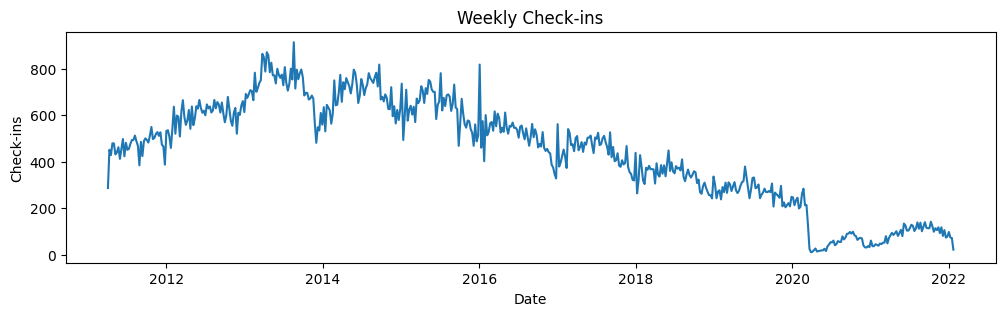

In [5]:
# 1. Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# 2. Set the 'date' column as the DataFrame index
df.set_index('date', inplace=True)

# 3. Aggregate checkins per week
df_weekly = df['checkins'].resample('W').sum()  # 'W' stands for week

# 4. Plot the aggregated time series
_, ax = plt.subplots(figsize=(12, 3))
ax.plot(df_weekly.index, df_weekly.values)
ax.set_title('Weekly Check-ins')
ax.set_xlabel('Date')
ax.set_ylabel('Check-ins')

plt.show()

In [6]:
# reseting the index
df_weekly = df_weekly.reset_index()

## <a id='toc1_2_'></a>[Time series components](#toc0_)

Additive:

    y = Level + Trend + Seasonality + Noise

Multiplicative:

    y = Level * Trend * Seasonality * Noise

### <a id='toc1_2_1_'></a>[Level](#toc0_)
The average value in the series

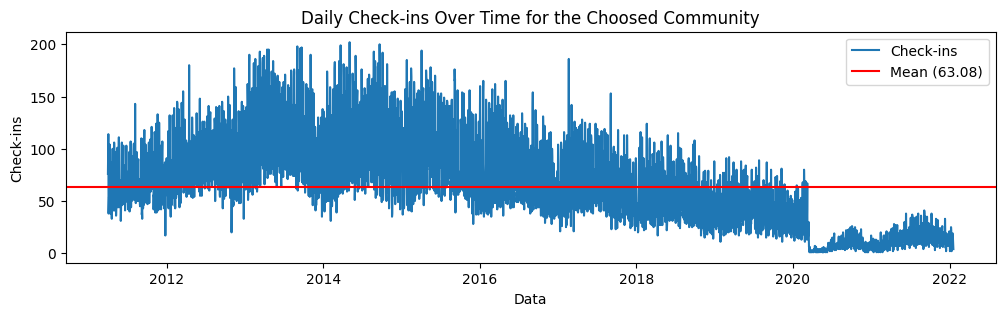

In [7]:
media_checkins = daily_df['checkins'].mean()

plt.figure(figsize=(12, 3))
plt.plot(daily_df['date'], daily_df['checkins'], label='Check-ins')

plt.axhline(y=media_checkins, color='red', linestyle='-', label=f'Mean ({media_checkins:.2f})')

plt.title('Daily Check-ins Over Time for the Choosed Community')
plt.xlabel('Data')
plt.ylabel('Check-ins')
plt.legend()

plt.show()

### <a id='toc1_2_2_'></a>[Trend, Seasonality and Noise](#toc0_)

We will decompose this time series using the `seasonal_decompose` method based on moving averages, and then ploting its results:

**Additive decomposition**

Quarterly analysis on the weekly dataset

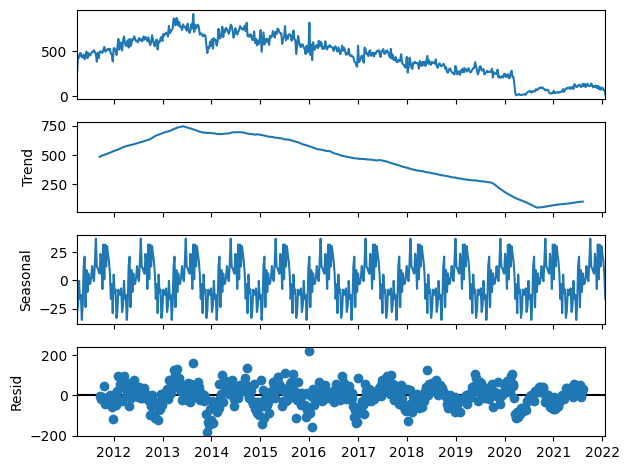

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_weekly.set_index('date', inplace=True)

# Time series decomposition in Python
result = seasonal_decompose(df_weekly, model='additive', period=48)
result.plot();

There is trend and a strong seasonal pattern

## <a id='toc1_3_'></a>[Sesonal patterns](#toc0_)

**Monthly Plot**

posx and posy should be finite values
posx and posy should be finite values


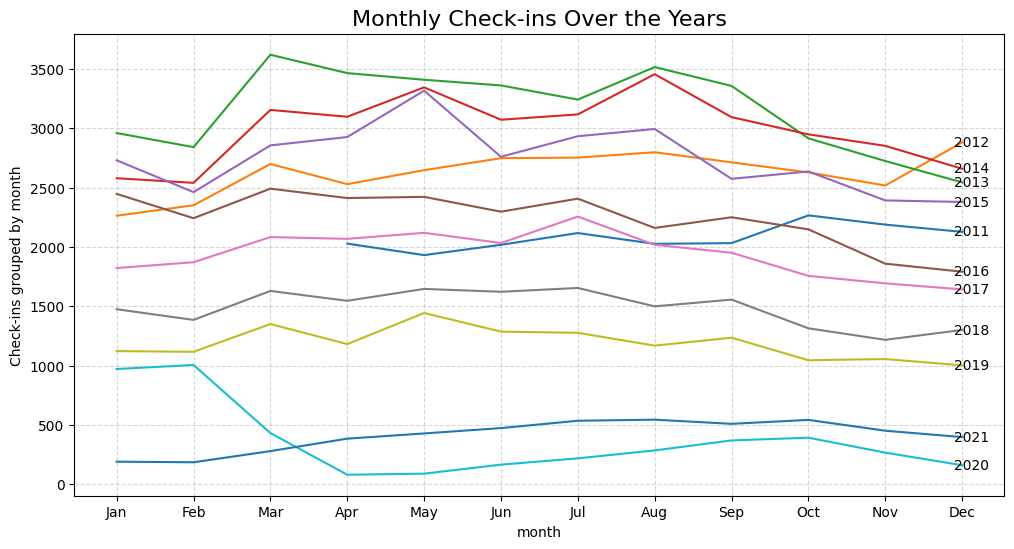

In [9]:
# Reset the index to ensure 'date' is a column
#daily_df = daily_df.reset_index()

# Create new dummy variables for the calendar dates (month and year)
daily_df['month'] = daily_df['date'].dt.month
daily_df['year'] = daily_df['date'].dt.year

# Group the data by month and year and sum the check-ins
df_grouped_monthly = daily_df.groupby(['month', 'year'])['checkins'].sum().unstack()

# Plot the grouped data
df_grouped_monthly.plot(figsize=(12, 6))

# Set x-axis labels for months (1 to 12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set y-axis label
plt.ylabel('Check-ins grouped by month')

# Remove the legend and add the year as a label at the end of each line
plt.legend().remove()
for year in daily_df['year'].unique():
    plt.text(11.9, df_grouped_monthly.loc[12, year], year, va='center')

# Show the plot
plt.title('Monthly Check-ins Over the Years', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## <a id='toc1_5_'></a>[Autocorrelation](#toc0_)

### <a id='toc1_5_1_'></a>[Lagged plots](#toc0_)

In [10]:
# lag plot from 1 to 9 lags
_, axes = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axes.flatten()):
    pd.plotting.lag_plot(daily_df['checkins'], lag=i+1, ax=ax)
    ax.set_title(f"Lag {i+1}")

### <a id='toc1_5_2_'></a>[ACF](#toc0_)

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

# Draw Plot
_, ax = plt.subplots(figsize=(10,4), dpi= 100)
plot_acf(daily_df['checkins'].tolist(), lags=50, ax=ax);

The ACF graph also show the weekly seasonality.

### <a id='toc1_5_3_'></a>[PACF](#toc0_)

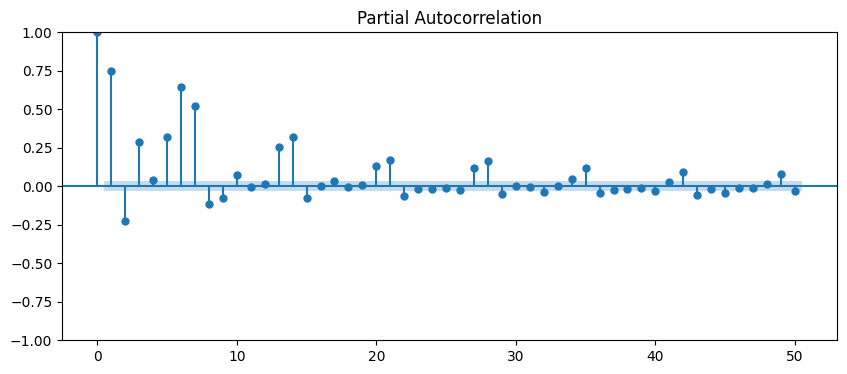

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

_, ax = plt.subplots(figsize=(10,4), dpi= 100)
plot_pacf(daily_df['checkins'].tolist(), lags=50, ax=ax);

PACF plots show the correlation between a time series and a lagged version of itself after removing the effects of intervening observations. 
From this graph we can see a hight correlation between the taraget variable and the weekly lag feature, that drecreases over time.

## <a id='toc1_6_'></a>[Stationarity](#toc0_)
Checking if the mean, variance and autocorrelation are constant over time.

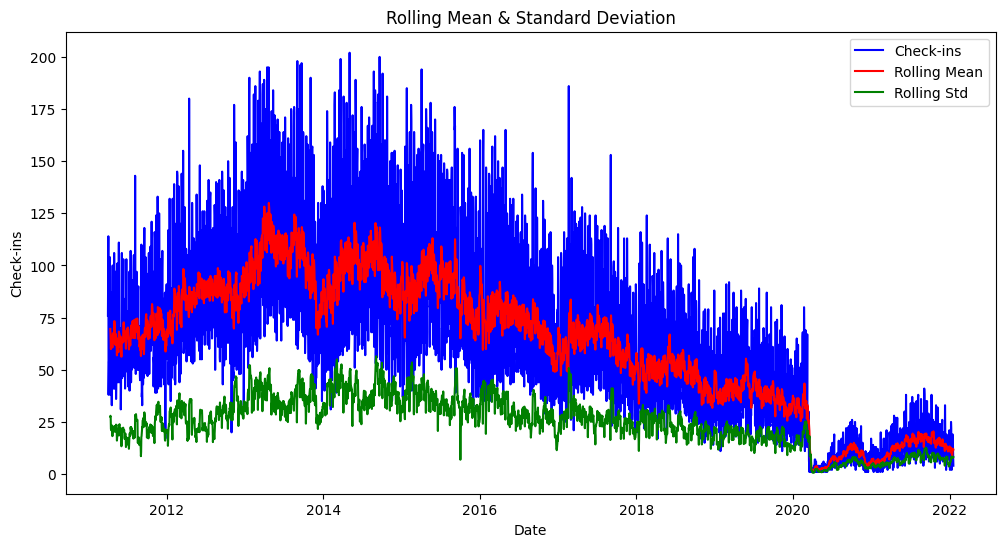

In [13]:
# Calculate rolling statistics
rolling_mean = daily_df['checkins'].rolling(window=12).mean()
rolling_std = daily_df['checkins'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(daily_df['date'], daily_df['checkins'], label='Check-ins', color='blue')
plt.plot(daily_df['date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(daily_df['date'], rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Check-ins')
plt.legend()
plt.show()

The data its not stationary! We can prove it by the clear variation on the mean.

### <a id='toc1_6_3_'></a>[Statistical Approach](#toc0_)

(from https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html)

**Augmented Dickey Fuller Test (ADF test)**

Test for stationarity 
- *Null Hypothesis*: The series has a unit root.
- *Alternate Hypothesis*: The series has no unit root.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_df['checkins'], autolag="AIC")

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')


ADF Statistic: -0.4808250549268075
p-value: 0.8957043543877437
Critical Values: {'1%': -3.43202013514632, '5%': -2.8622779742883466, '10%': -2.5671628322989846}


Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis can not be rejected. So we cannot prove that the date is stationary

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS test)**

KPSS is another test for checking the stationarity of a time series, used to determine the presence of unit root in the series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.
- *Null Hypothesis*: The series has no unit root.
- *Alternate Hypothesis*: The series has a unit root. 

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is stationary.

In [15]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(daily_df['checkins'], regression="c", nlags="auto")

print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')
print(f'Critical Values: {kpss_result[3]}');

KPSS Statistic: 8.460652412955369
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\euing\AppData\Local\Temp\ipykernel_6860\1236147633.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(daily_df['checkins'], regression="c", nlags="auto")


The serie has a Unit Root. 

**How to interpret these tests?**

| KPSS Test Result                     | ADF Test Result                     | Conclusion                                                                                                  |
|--------------------------------------|-------------------------------------|-------------------------------------------------------------------------------------------------------------|
| Non-stationary                       | Non-stationary                      | The series is not stationary                                                                                 |
| Stationary                           | Stationary                          | The series is stationary                                                                                     |
| Stationary                           | Non-stationary                      | The series is trend stationary. Trend needs to be removed to make series strictly stationary.                |
| Non-stationary                       | Stationary                          | The series is difference stationary. Differencing is needed to make the series stationary.                   |


Now we can conclude statistically that the series is not stationary!

## <a id='toc1_7_'></a>[Transformations](#toc0_)

Transformations can be useful to stabilize variation, which can be useful to create stationary timeseries. 


In [16]:
import pymannkendall as mk

# Apply the Mann-Kendall test to the 'checkins' column
result = mk.original_test(daily_df['checkins'])

# Print the result
print(result)


Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-47.362269350232765, Tau=-0.5027871193979119, s=-3915420.0, var_s=6834259754.0, slope=-0.02273487128050819, intercept=103.85590103644266)


# <a id='toc2_'></a>[Modeling](#toc0_)

In this case we will predict the checkins. We will use the last 30 days for training and remaining for testing.

In [17]:
# user selection
DATE_SPLIT = '2021-12-19'
TARGET_NAME = 'checkins'

# train test split
df_daily_train = daily_df[daily_df['date'] <= DATE_SPLIT][['date', TARGET_NAME]]
df_daily_test = daily_df[daily_df['date'] > DATE_SPLIT][['date', TARGET_NAME]]

checkins_train = df_daily_train[TARGET_NAME].values
checkins_test = df_daily_test[TARGET_NAME].values

horizon = len(checkins_test)

## <a id='toc2_1_'></a>[Training and forecasting](#toc0_)

### <a id='toc2_1_1_'></a>[Baseline](#toc0_)

Igor foward the last value and used as a baseline model 

In [18]:
import pmdarima as pmd

# Set the 'date' column as the index
#df_daily_train.set_index('date', inplace=True)

# Assuming the column to forecast is named 'value' (replace it with the actual column name)
model = pmd.auto_arima(df_daily_train['checkins'],
                       start_p=1, start_q=1,
                       test='adf',   # Use Augmented Dickey-Fuller test for stationarity
                       m=7,         # Seasonal period 
                       seasonal=True,  # Enable seasonal ARIMA
                       trace=True)    # Show the fitting process


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=31930.890, Time=3.76 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=40318.809, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=33249.894, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=35967.328, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=45024.977, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=35444.839, Time=1.41 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=33250.638, Time=2.35 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=inf, Time=7.42 sec
 ARIMA(1,0,1)(1,0,2)[7] intercept   : AIC=inf, Time=8.58 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=36757.834, Time=0.83 sec
 ARIMA(1,0,1)(0,0,2)[7] intercept   : AIC=34525.338, Time=3.64 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=32233.827, Time=9.30 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=9.65 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=31451.472, Time=4.33 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   :

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

### <a id='toc2_1_2_'></a>[SARIMAX](#toc0_)

In [20]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming daily_df, TARGET_NAME, and DATE_SPLIT are already defined.

# User selection
EXOG_NAMES = ['is_weekend', 'quarter', 'is_month_start', 'is_month_end', 
              'is_holiday', 'is_covid_period', 'economy_employment_rate', 
              'economy_consumer_confidence', 'economy_gdp', 
              'economy_inflation_rate'] 

# Train-test split based on the date
df_daily_train = daily_df[daily_df['date'] <= DATE_SPLIT][['date', TARGET_NAME] + EXOG_NAMES]
df_daily_test = daily_df[daily_df['date'] > DATE_SPLIT][['date', TARGET_NAME] + EXOG_NAMES]

# Set 'date' as index for both train and test
df_daily_train.set_index('date', inplace=True)
df_daily_test.set_index('date', inplace=True)

# Extract the target values (checkins) for train and test
checkins_train = df_daily_train[TARGET_NAME].values
checkins_test = df_daily_test[TARGET_NAME].values

# Extract the exogenous variables (train and test) as 2D arrays
exog_train = df_daily_train[EXOG_NAMES].values  # 2D array with multiple exogenous variables
exog_test = df_daily_test[EXOG_NAMES].values    # 2D array for the test set

# Horizon for prediction (i.e., number of future steps)
horizon = len(checkins_test)

# Define and fit the SARIMA model with multiple exogenous variables
sarima_model = SARIMAX(checkins_train, 
                       order=(1, 0, 0),               # Non-seasonal order
                       seasonal_order=(1, 0, 1, 7),   # Seasonal order with 7-period seasonality
                       exog=exog_train)               # Exogenous variables for training

# Fit the model
sarima_fit = sarima_model.fit(disp=False)

# Generate forecasts with confidence intervals
forecast_object = sarima_fit.get_forecast(steps=horizon, exog=exog_test)

# Get the predicted mean (point forecasts)
mean_forecast = forecast_object.predicted_mean

# Get the confidence intervals (95% and 80%)
conf_int_95 = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval
conf_int_80 = forecast_object.conf_int(alpha=0.20)   # 80% confidence interval

# Prepare the output in the required format
y_hat_sarimax = {
    'mean': mean_forecast,  # mean_forecast is already a numpy array
    'lo-95': conf_int_95[:, 0],  # Lower bound for 95%
    'hi-95': conf_int_95[:, 1],  # Upper bound for 95%
    'lo-80': conf_int_80[:, 0],  # Lower bound for 80%
    'hi-80': conf_int_80[:, 1]   # Upper bound for 80%
}



c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
y_hat_sarimax

{'mean': array([ 3.73486878,  4.08022261,  7.42212216,  3.60004638, 20.86482263,
        36.32113137, 22.02279374,  5.88609647,  4.94677056,  7.69078052,
         3.73658709, 22.64720243, 35.61326334, 19.61334659,  2.79136453,
         1.87004645,  4.55302834,  0.68485435,  6.42294872, 23.21640413,
        20.21492365,  2.72877711,  1.82759582,  4.45192049,  0.6683114 ,
         6.28095961, 23.73919084, 20.80332846, 13.84407076,  1.78606975,
         4.35302162]),
 'lo-95': array([-22.49011313, -24.27279453, -21.27469671, -25.15442639,
         -7.89937506,   7.55529171,  -6.74332319, -23.29381469,
        -24.30244244, -21.57011965, -25.52628629,  -6.61600416,
          6.35000047,  -9.64992578, -26.85468237, -27.84015487,
        -25.16799342, -29.03799432, -23.30020845,  -6.50680514,
         -9.50829442, -27.35515171, -28.31682212, -25.70270059,
        -29.48803239, -23.87567509,  -6.41749299,  -9.35336367,
        -16.65291616, -28.76801048, -26.21068974]),
 'hi-95': array([29.95

In [22]:
'''# User selection
EXOG_NAMES = ['is_weekend', 'quarter', 'is_month_start', 'is_month_end', 'is_holiday', 'is_covid_period', 'economy_employment_rate', 'economy_consumer_confidence', 'economy_gdp', 'economy_inflation_rate'] 

# Train-test split based on the date
df_daily_train = daily_df[daily_df['date'] <= DATE_SPLIT][['date', TARGET_NAME] + EXOG_NAMES]
df_daily_test = daily_df[daily_df['date'] > DATE_SPLIT][['date', TARGET_NAME] + EXOG_NAMES]

# Set 'date' as index for both train and test
df_daily_train.set_index('date', inplace=True)
df_daily_test.set_index('date', inplace=True)

# Extract the target values (checkins) for train and test
checkins_train = df_daily_train[TARGET_NAME].values
checkins_test = df_daily_test[TARGET_NAME].values

# Extract the exogenous variables (train and test) as 2D arrays
exog_train = df_daily_train[EXOG_NAMES].values  # 2D array with multiple exogenous variables
exog_test = df_daily_test[EXOG_NAMES].values    # 2D array for the test set

# Horizon for prediction (i.e., number of future steps)
horizon = len(checkins_test)

# Define and fit the SARIMA model with multiple exogenous variables
sarima_model = SARIMAX(checkins_train, 
                       order=(1, 0, 0),               # Non-seasonal order
                       seasonal_order=(1, 0, 1, 7),  # Seasonal order with 12-period seasonality
                       exog=exog_train)               # Exogenous variables for training

# Fit the model
sarima_fit = sarima_model.fit(disp=False)

# Predict for the horizon, including exogenous variables for the forecast period
y_hat_sarimax = sarima_fit.predict(start=len(checkins_train), 
                                  end=len(checkins_train) + horizon - 1, 
                                  exog=exog_test)  # Exogenous variables for the test set

# Display the predictions
y_hat_sarimax'''

"# User selection\nEXOG_NAMES = ['is_weekend', 'quarter', 'is_month_start', 'is_month_end', 'is_holiday', 'is_covid_period', 'economy_employment_rate', 'economy_consumer_confidence', 'economy_gdp', 'economy_inflation_rate'] \n\n# Train-test split based on the date\ndf_daily_train = daily_df[daily_df['date'] <= DATE_SPLIT][['date', TARGET_NAME] + EXOG_NAMES]\ndf_daily_test = daily_df[daily_df['date'] > DATE_SPLIT][['date', TARGET_NAME] + EXOG_NAMES]\n\n# Set 'date' as index for both train and test\ndf_daily_train.set_index('date', inplace=True)\ndf_daily_test.set_index('date', inplace=True)\n\n# Extract the target values (checkins) for train and test\ncheckins_train = df_daily_train[TARGET_NAME].values\ncheckins_test = df_daily_test[TARGET_NAME].values\n\n# Extract the exogenous variables (train and test) as 2D arrays\nexog_train = df_daily_train[EXOG_NAMES].values  # 2D array with multiple exogenous variables\nexog_test = df_daily_test[EXOG_NAMES].values    # 2D array for the test set\

In [23]:
df_daily_test['sarimax_forecast'] = y_hat_sarimax['mean']

### <a id='toc2_1_2_'></a>[SARIMA](#toc0_)

In [24]:
sarima=SARIMAX(checkins_train,order=(1,0,0),seasonal_order=(1,0,1,7))
sarima=sarima.fit()

forecast_object = sarima.get_forecast(steps=horizon)  # forecast the future steps

conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# If you also want an 80% confidence interval:
conf_int_80 = forecast_object.conf_int(alpha=0.20)  # 80% confidence interval

y_hat_sarima = forecast_object.predicted_mean

In [25]:
df_daily_test['sarima_forecast'] = y_hat_sarima

### <a id='toc2_1_2_'></a>[Exponetial Smoothing (ETS)](#toc0_)

In the ETS model, the state-space equations can be determined based on their `M` multiplicative, `A` additive, `Z` optimized or `N` ommited components. If you want to dampen the trend, you should select `damped=TRUE`. To dampen the seasonality, also `phi=True`.

In [26]:
from statsforecast.models import ETS

#for ets we pass a ZMZ model (Multiplicative trend, optimal error and seasonality) which stands for error selected optimally:
ets = ETS(model='ZMZ')
ets = ets.fit(y=checkins_train)

#Make predictions with ETS model:
y_hat_ets = ets.predict(h=horizon, level=[80, 95])
y_hat_ets

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python310\lib\site-packages\statsforecast\models.py:887: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


{'mean': array([13.52445738, 13.52898936, 13.53352287, 13.53805789, 13.54259444,
        13.5471325 , 13.55167209, 13.5562132 , 13.56075583, 13.56529998,
        13.56984565, 13.57439285, 13.57894157, 13.58349181, 13.58804358,
        13.59259688, 13.5971517 , 13.60170805, 13.60626592, 13.61082532,
        13.61538625, 13.61994871, 13.62451269, 13.62907821, 13.63364525,
        13.63821383, 13.64278394, 13.64735557, 13.65192874, 13.65650345,
        13.66107968]),
 'lo-95': array([0.97034424, 1.0692381 , 1.04377436, 1.43946629, 1.67045963,
        1.10173269, 0.93581271, 1.04584335, 1.32889196, 1.01700279,
        1.48670153, 0.85541418, 1.09867227, 0.59346822, 1.05953865,
        1.1378276 , 1.49938528, 0.99310041, 1.57378971, 1.51919254,
        1.16376028, 1.38661667, 1.74192949, 1.24545854, 1.25182623,
        1.26730594, 1.13285555, 1.31891055, 1.2919629 , 1.17528578,
        1.03874052]),
 'lo-80': array([5.27669409, 5.50891476, 5.21707093, 5.48709039, 5.5807921 ,
        5.48232

In [27]:
#add the predictions to the dataframe
df_daily_test['ets_forecast'] = y_hat_ets['mean']

### <a id='toc2_1_3_'></a>[ARIMA](#toc0_)

Documentation: https://nixtlaverse.nixtla.io/statsforecast/src/core/models.html#autoarima

In [28]:
from statsforecast.models import AutoARIMA

# AutoARIMA's usage example
arima = AutoARIMA(trace=True)
arima = arima.fit(y=checkins_train)

y_hat_arima = arima.predict(h=horizon, level=[80, 95])
y_hat_arima


ARIMA(2,1,2)                   :34826.33102247381

ARIMA(0,1,0)                   :37685.94854257363

ARIMA(1,1,0)                   :37669.22930976028

ARIMA(0,1,1)                   :37614.02891957036

ARIMA(1,1,2)                   :35702.87911613952

ARIMA(2,1,1)                   :35273.36095791635

ARIMA(3,1,2)                   :35268.78171685133

ARIMA(2,1,3)                   :35451.24939739083

ARIMA(1,1,1)                   :37447.0504715761

ARIMA(1,1,3)                   :35648.24340603644

ARIMA(3,1,1)                   :35206.12278614251

ARIMA(3,1,3)                   :34759.808958009235

ARIMA(4,1,3)                   :37699.9843866995

ARIMA(3,1,4)                   :inf

ARIMA(2,1,4)                   :inf

ARIMA(4,1,2)                   :37697.97618683608

ARIMA(4,1,4)                   :37701.993615090374
Now re-fitting the best model(s) without approximations...


ARIMA(3,1,3)                   :34759.808958009235


{'mean': array([15.52933762, 13.02314283, 11.91059752, 11.76327033, 12.83671755,
        13.66106696, 13.98649859, 13.60923741, 13.12692616, 12.83108946,
        12.90702697, 13.14444778, 13.35014348, 13.38035132, 13.28447524,
        13.16314421, 13.11196463, 13.13854015, 13.20073575, 13.24283469,
        13.24417274, 13.21696104, 13.18978818, 13.18071755, 13.18997647,
        13.20492802, 13.21361909, 13.21221624, 13.20513989, 13.19907367,
        13.19780558]),
 'lo-95': 0    -24.587145
 1    -32.294567
 2    -34.380709
 3    -37.924098
 4    -38.366122
 5    -37.630649
 6    -38.600733
 7    -40.280305
 8    -40.992379
 9    -41.296313
 10   -41.296250
 11   -41.060668
 12   -40.934237
 13   -41.119894
 14   -41.390359
 15   -41.579151
 16   -41.647029
 17   -41.632328
 18   -41.599912
 19   -41.620419
 20   -41.699295
 21   -41.796824
 22   -41.874627
 23   -41.922801
 24   -41.952398
 25   -41.983510
 26   -42.028669
 27   -42.086550
 28   -42.147226
 29   -42.202470
 30   -42.25

In [29]:
# add the predictions to the dataframe
df_daily_test['arima_forecast'] = y_hat_arima['mean']

## <a id='toc2_2_'></a>[Visualizing](#toc0_)

### <a id='toc2_2_1_'></a>[Predictions](#toc0_)

In [30]:
def visualize(train, test, title):
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))

    # Concatenar os DataFrames de treino e teste
    plot_df = pd.concat([train, test]).set_index('date')

    # Filtrar os últimos 120 valores
    plot_df = plot_df.tail(120)

    # Plotar as colunas com as cores especificadas
    plot_df['checkins'].plot(ax=ax, linewidth=2, label='checkins', color='#4141e1')
    plot_df['actual'].plot(ax=ax, linewidth=2, label='actual', color='#4191e1')
    plot_df['sarimax_forecast'].plot(ax=ax, linewidth=2, label='sarimax_forecast', color='red')
    plot_df['ets_forecast'].plot(ax=ax, linewidth=2, label='ets_forecast', color='yellow')
    plot_df['sarima_forecast'].plot(ax=ax, linewidth=2, label='sarima_forecast', color='orange')

    # Especificar as características do gráfico
    ax.set_title(title, fontsize=22)
    ax.set_ylabel('Checkins', fontsize=20)
    ax.set_xlabel('Day', fontsize=20)
    ax.legend()
    ax.grid()

    # Linha vertical para indicar a separação entre treino e teste
    plt.axvline(x='2021-12-20', color='black', linestyle='-', lw=1)

    plt.show()

In [31]:
df_daily_train = df_daily_train.reset_index()  # Resets the index, and moves 'date' index back into a column

In [32]:
df_daily_test2 = df_daily_test[['checkins','sarimax_forecast', 'ets_forecast','sarima_forecast']]
df_daily_test2 = df_daily_test2.reset_index()
df_daily_test2.rename(columns={'checkins': 'actual'}, inplace=True)


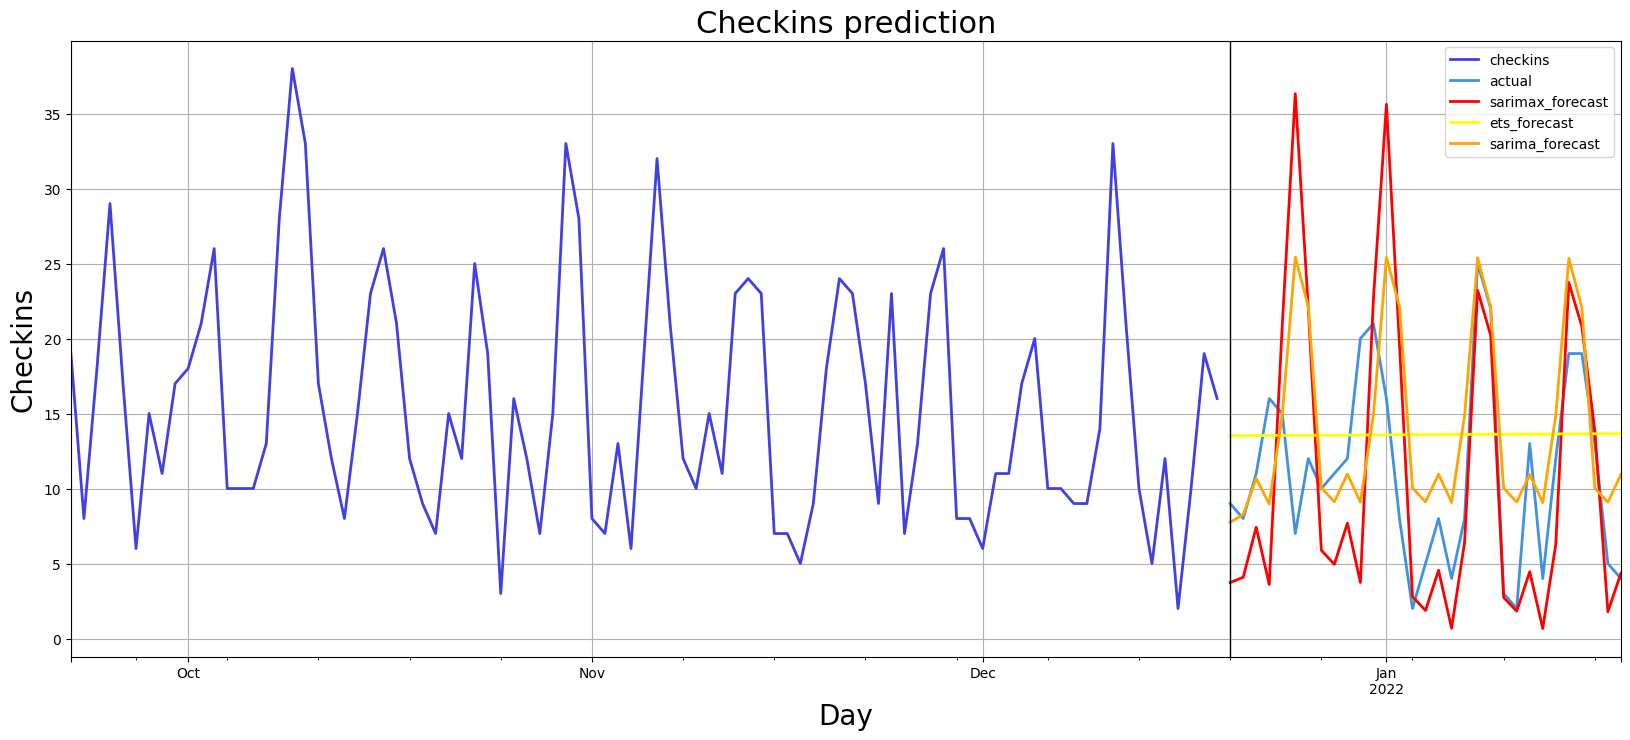

In [33]:
visualize(df_daily_train[['date', TARGET_NAME]], df_daily_test2, 'Checkins prediction')

### <a id='toc2_2_2_'></a>[Fitted values](#toc0_)

Each observation in a time series can be forecast using all previous observations. We call these fitted values. Fitted values are often not true forecasts because any parameters involved in the forecasting method are estimated using all available observations in the time series, including future observations.

Example for ARIMA use-case:

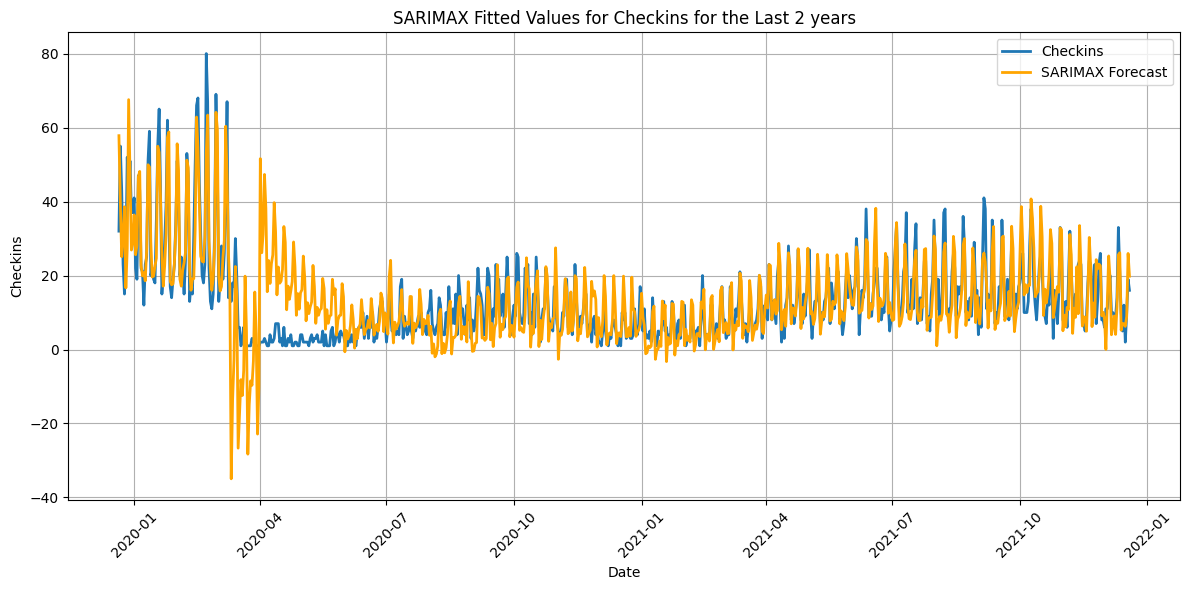

In [34]:
# Get the fitted values for the model
viz_forecasting = 'sarimax_forecast'
fitted_values = sarima_fit.fittedvalues

# Add the fitted values to the training dataframe
df_daily_train[viz_forecasting] = fitted_values

# Filter the last 120 days of the data
df_plot = df_daily_train.tail(730)

# Reset index to ensure 'date' is a column again
df_plot.reset_index(inplace=True)

# Visualize
def visualize(data, title):
    plt.figure(figsize=(12, 6))
    
    # Plot the actual 'checkins' in black
    plt.plot(data['date'], data[TARGET_NAME], label='Checkins', linewidth=2)
    
    # Plot the fitted 'sarimax_forecast' in red
    plt.plot(data['date'], data[viz_forecasting], label='SARIMAX Forecast', color='orange', linewidth=2)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Checkins')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Call the visualize function with the filtered data
visualize(df_plot[['date', TARGET_NAME, viz_forecasting]], 
          'SARIMAX Fitted Values for Checkins for the Last 2 years')




### <a id='toc2_2_3_'></a>[Prediction Intervals](#toc0_)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the dataframe of predicted values with the dataframe of observed values:
df_sarimax_test = pd.concat([df_daily_test.reset_index()[["date", "checkins"]], pd.DataFrame(y_hat_sarimax)], axis=1)
df_sarimax_test = df_sarimax_test.rename(columns={"mean": "forecast"})

# Concatenate train and test data
df_plot = pd.concat([df_daily_train[['date', TARGET_NAME]], df_sarimax_test]).set_index('date')

# Filter the last 120 values
df_plot = df_plot.tail(120)

# Plot the filtered dataframe
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

# Plot the checkins line in black
ax.plot(df_plot.index, df_plot['checkins'], label='Checkins', linewidth=2)

# Plot the forecast line in red
ax.plot(df_plot.index, df_plot['forecast'], color='orange', label='Forecast', linewidth=2)

# Add confidence intervals
ax.fill_between(df_plot.index, 
                df_plot['lo-80'], 
                df_plot['hi-80'],
                alpha=.35,
                color='blue',
                label='80% Confidence Interval')
ax.fill_between(df_plot.index, 
                df_plot['lo-95'], 
                df_plot['hi-95'],
                alpha=.2,
                color='blue',
                label='95% Confidence Interval')

# Specify graph features
ax.set_title('Daily Checkins Predicted By SARIMAX (Last 120 Days)', fontsize=20)
ax.set_ylabel('Checkins', fontsize=15)
ax.set_xlabel('Day', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid()

plt.show()


## <a id='toc2_3_'></a>[Residuals diagnostics](#toc0_)

In [36]:
# make sure this dataset contains the arima fitted values
residuals = df_daily_train[TARGET_NAME] - df_daily_train["sarimax_forecast"]
df_daily_train['sarimax_residuals'] = residuals

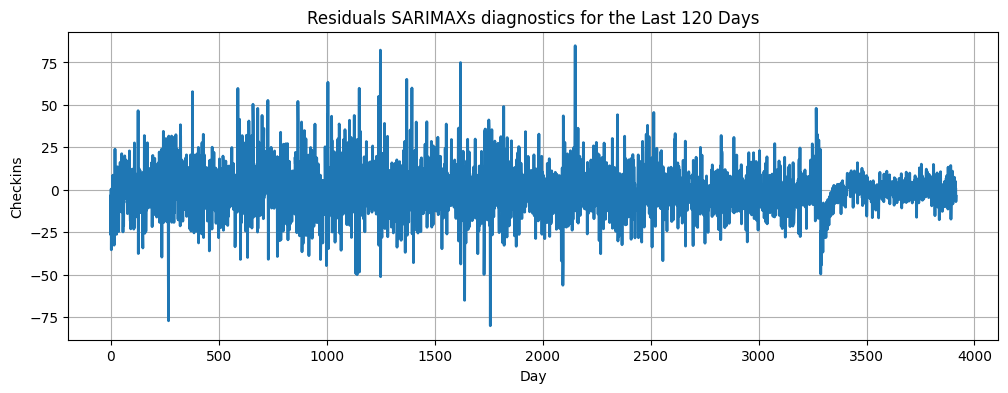

In [37]:
# plot the residuals
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
df_daily_train['sarimax_residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title(f'Residuals SARIMAXs diagnostics for the Last 120 Days')
ax.set_ylabel('Checkins')
ax.set_xlabel('Day')
ax.grid()

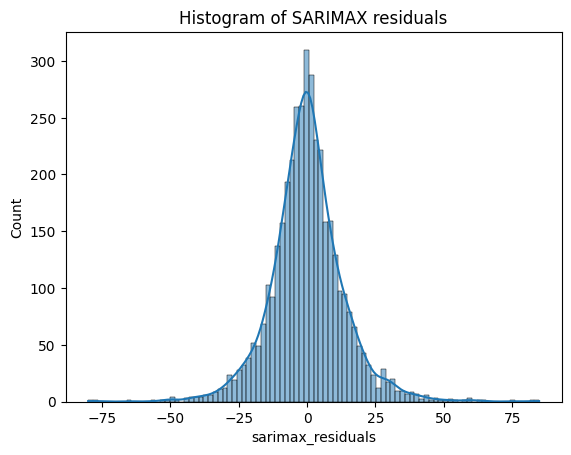

In [38]:
sns.histplot(data=df_daily_train, x="sarimax_residuals", kde=True)
plt.title("Histogram of SARIMAX residuals")
plt.show()

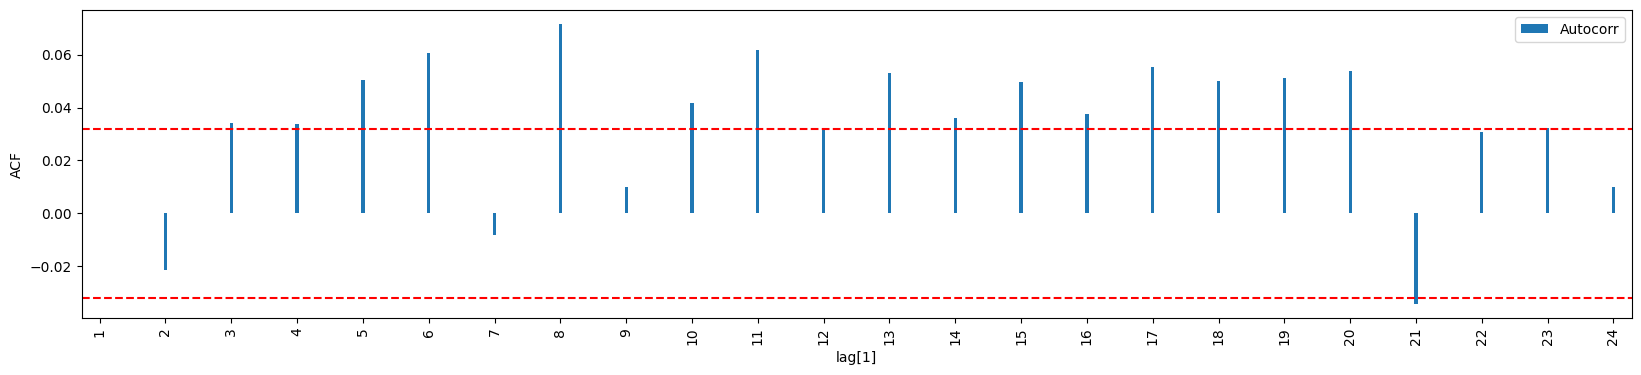

In [39]:
import math

ticker_data = df_daily_train['sarimax_residuals']
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(df_daily_train['sarimax_residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')
 
# axis names
plt.xlabel("lag[1]")
plt.ylabel("ACF");

## <a id='toc2_4_'></a>[Evaluation](#toc0_)

In [40]:
'''accuracy() function: Return a dataframe whith the measures RMSE, MAE, MAPE and MASE of the models evaluated.

* df_forecast: Dataframe with a columns that contain observed values and columns that contains forecasts.
* target: Column name that contain the observed values.
* y_train_serie: Numpy array that contain the values used to train the forecast models.
* seasonality: Factor relative with the seasonallity of the time series forecasted. For non seasonallity time series the factor is 1,
for quarter seasonallity the the factor is 4, for monthly seasonallity the the factor is 12.'''

import numpy as np
def accuracy(df_forecast, target, y_train_serie, seasonality):

    method = df_forecast.columns[1:]
    rmse_results = []
    mae_results = []
    mape_results = []
    mase_results = []

    y = df_forecast[target].values
    scale = np.abs(y_train_serie[:-seasonality] - y_train_serie[seasonality:])
    scale = np.average(scale)

    for i in method:

        y_hat = df_forecast[i].values
        d = y - y_hat
        mae_f = np.mean(abs(d))
        rmse_f = np.sqrt(np.mean(d**2))
        mape = np.mean(np.abs((y - y_hat)/y))*100
        mase = mae_f / scale
        mae_results.append(np.round(mae_f,2))
        rmse_results.append(np.round(rmse_f,2))
        mape_results.append(np.round(mape,2))
        mase_results.append(np.round(mase,2))

    accuracy_df = pd.DataFrame({'Method':method,
                    'RMSE':rmse_results,
                    'MAE':mae_results,
                    'MAPE':mape_results,
                    'MASE':mase_results})

    return accuracy_df

In [41]:
#df_daily_test2 = df_daily_test2.reset_index()
#df_daily_test2

In [42]:
df_daily_test=df_daily_test.reset_index()


In [43]:
df_daily_test

date  checkins  is_weekend  quarter  is_month_start  is_month_end  \
0  2021-12-20       9.0           0        4               0             0   
1  2021-12-21       8.0           0        4               0             0   
2  2021-12-22      11.0           0        4               0             0   
3  2021-12-23      16.0           0        4               0             0   
4  2021-12-24      15.0           0        4               0             0   
5  2021-12-25       7.0           1        4               0             0   
6  2021-12-26      12.0           1        4               0             0   
7  2021-12-27      10.0           0        4               0             0   
8  2021-12-28      11.0           0        4               0             0   
9  2021-12-29      12.0           0        4               0             0   
10 2021-12-30      20.0           0        4               0             0   
11 2021-12-31      21.0           0        4               0             1   
12 2022-01-01      16.0           1        1               1             0   
13 2022-01-02       8.0           1        1               0             0   
14 2022-01-03       2.0           0        1               0             0   
15 2022-01-04       5.0           0        1               0             0   
16 2022-01-05       8.0           0        1               0             0   
17 2022-01-06       4.0           0        1               0             0   
18 2022-01-07       8.0           0        1               0             0   
19 2022-01-08      25.0           1        1               0             0   
20 2022-01-09      22.0           1        1               0             0   
21 2022-01-10       3.0           0        1               0             0   
22 2022-01-11       2.0           0        1               0             0   
23 2022-01-12      13.0           0        1               0             0   
24 2022-01-13       4.0           0        1               0             0   
25 2022-01-14      12.0           0        1               0             0   
26 2022-01-15      19.0           1        1               0             0   
27 2022-01-16      19.0           1        1               0             0   
28 2022-01-17      13.0           0        1               0             0   
29 2022-01-18       5.0           0        1               0             0   
30 2022-01-19       4.0           0        1               0             0   

    is_holiday  is_covid_period  economy_employment_rate  \
0            0                1                      3.9   
1            0                1                      3.9   
2            0                1                      3.9   
3            0                1                      3.9   
4            1                1                      3.9   
5            1                1                      3.9   
6            0                1                      3.9   
7            0                1                      3.9   
8            0                1                      3.9   
9            0                1                      3.9   
10           0                1                      3.9   
11           1                1                      3.9   
12           1                1                      4.0   
13           0                1                      4.0   
14           0                1                      4.0   
15           0                1                      4.0   
16           0                1                      4.0   
17           0                1                      4.0   
18           0                1                      4.0   
19           0                1                      4.0   
20           0                1                      4.0   
21           0                1                      4.0   
22           0                1                      4.0   
23           0                1                      4.0   
24          

In [44]:
dataset= df_daily_test[['date','checkins','sarimax_forecast','sarima_forecast','ets_forecast']]
dataset.to_csv('ts_metrics.csv', index=False)

In [45]:
# Check if your target column is available
TARGET_NAME = 'checkins'  # Replace this with the actual target column name if it's different

# Ensure the correct reference in your accuracy function call
accuracy(df_daily_test[['checkins','sarimax_forecast','sarima_forecast','ets_forecast']], TARGET_NAME, checkins_train, 7)


Method  RMSE   MAE    MAPE  MASE
0  sarimax_forecast  8.54  5.77   59.34  0.45
1   sarima_forecast  6.64  5.04   83.10  0.39
2      ets_forecast  6.72  5.77  109.16  0.45

### <a id='toc1_6_3_'></a>[Statistical Approach](#toc0_)

(from https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html)

**Augmented Dickey Fuller Test (ADF test)**

Test for stationarity 
- *Null Hypothesis*: The series has a unit root.
- *Alternate Hypothesis*: The series has no unit root.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.